## 来自谢博士的scorecardpy包的演示


# scorecardpy

[![PyPI version](https://img.shields.io/pypi/pyversions/scorecardpy.svg)](https://pypi.python.org/pypi/scorecardpy)
[![PyPI release](https://img.shields.io/pypi/v/scorecardpy.svg)](https://pypi.python.org/pypi/scorecardpy)
[![Downloads](http://pepy.tech/badge/scorecardpy)](http://pepy.tech/project/scorecardpy)
[![Downloads](https://pepy.tech/badge/scorecardpy/month)](https://pepy.tech/project/scorecardpy/month)


This package is python version of R package [scorecard](https://github.com/ShichenXie/scorecard). 
Its goal is to make the development of traditional credit risk scorecard model easier and efficient by providing functions for some common tasks. 
- data partition (`split_df`)
- variable selection (`iv`, `var_filter`)
- weight of evidence (woe) binning (`woebin`, `woebin_plot`, `woebin_adj`, `woebin_ply`)
- scorecard scaling (`scorecard`, `scorecard_ply`)
- performance evaluation (`perf_eva`, `perf_psi`)

## Installation

- Install the release version of `scorecardpy` from [PYPI](https://pypi.org/project/scorecardpy/) with:
```
pip install scorecardpy
```

- Install the latest version of `scorecardpy` from [github](https://github.com/shichenxie/scorecardpy) with:
```
pip install git+git://github.com/shichenxie/scorecardpy.git
```

## Example

This is a basic example which shows you how to develop a common credit risk scorecard:

``` python
# Traditional Credit Scoring Using Logistic Regression
import scorecardpy as sc

# data prepare ------
# load germancredit data
dat = sc.germancredit()

# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(dat, y="creditability")

# breaking dt into train and test
train, test = sc.split_df(dt_s, 'creditability').values()

# woe binning ------
bins = sc.woebin(dt_s, y="creditability")
# sc.woebin_plot(bins)

# binning adjustment
# # adjust breaks interactively
# breaks_adj = sc.woebin_adj(dt_s, "creditability", bins) 
# # or specify breaks manually
breaks_adj = {
    'age.in.years': [26, 35, 40],
    'other.debtors.or.guarantors': ["none", "co-applicant%,%guarantor"]
}
bins_adj = sc.woebin(dt_s, y="creditability", breaks_list=breaks_adj)

# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'creditability']
X_train = train_woe.loc[:,train_woe.columns != 'creditability']
y_test = test_woe.loc[:,'creditability']
X_test = test_woe.loc[:,train_woe.columns != 'creditability']

# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)
```


In [ ]:
环境如果无scorecardpy包，需手动安装
#pip install scorecardpy

In [1]:
import scorecardpy as sc

In [2]:
# data prepare ------
# load germancredit data
dat = sc.germancredit()

In [4]:
dat.head()

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : divorced/separated,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,male : divorced/separated,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,good
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : divorced/separated,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,bad


In [5]:
# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(dat, y="creditability")

[INFO] filtering variables ...


In [6]:
# breaking dt into train and test
train, test = sc.split_df(dt_s, 'creditability').values()

[INFO] creating woe binning ...


{'installment.rate.in.percentage.of.disposable.income': <Figure size 432x288 with 2 Axes>,
 'duration.in.month': <Figure size 432x288 with 2 Axes>,
 'property': <Figure size 432x288 with 2 Axes>,
 'age.in.years': <Figure size 432x288 with 2 Axes>,
 'other.installment.plans': <Figure size 432x288 with 2 Axes>,
 'savings.account.and.bonds': <Figure size 432x288 with 2 Axes>,
 'housing': <Figure size 432x288 with 2 Axes>,
 'other.debtors.or.guarantors': <Figure size 432x288 with 2 Axes>,
 'credit.amount': <Figure size 432x288 with 2 Axes>,
 'status.of.existing.checking.account': <Figure size 432x288 with 2 Axes>,
 'present.employment.since': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>,
 'credit.history': <Figure size 432x288 with 2 Axes>}

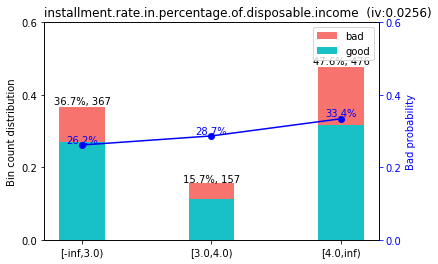

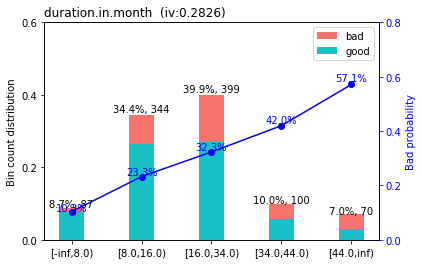

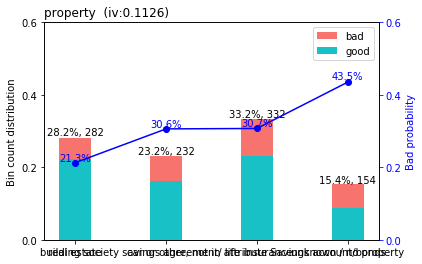

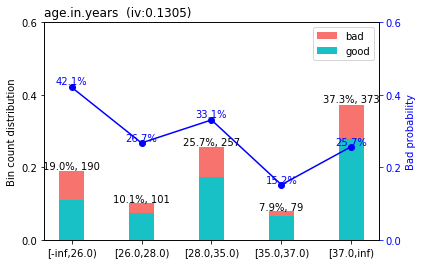

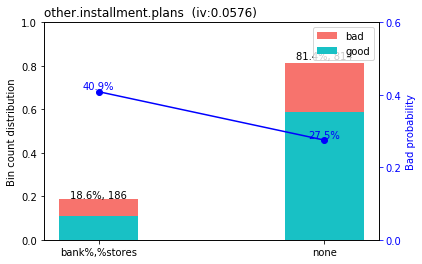

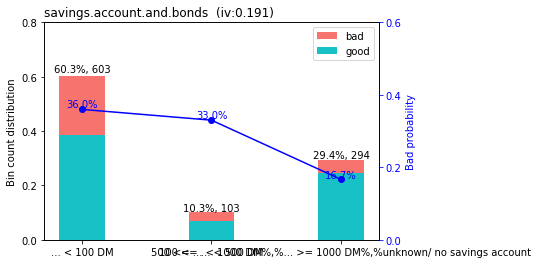

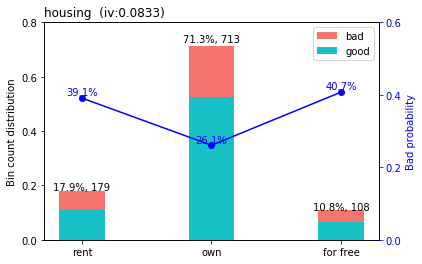

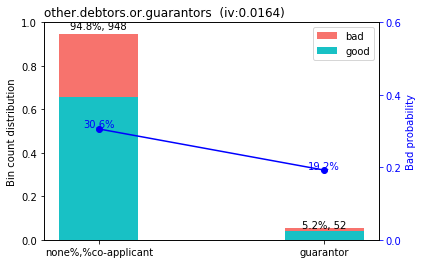

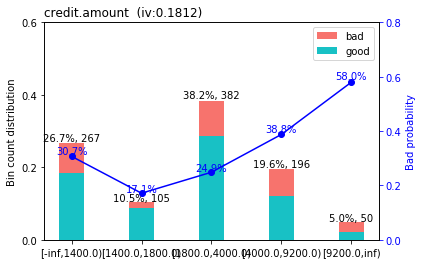

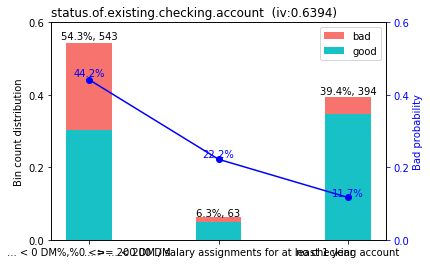

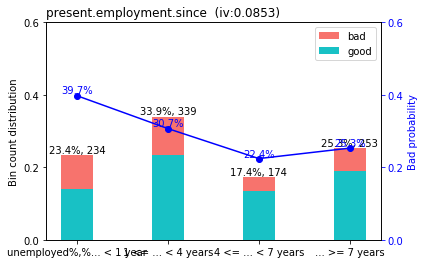

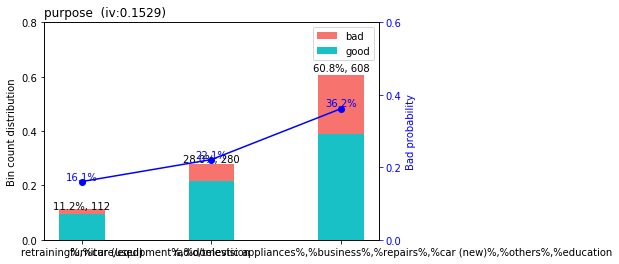

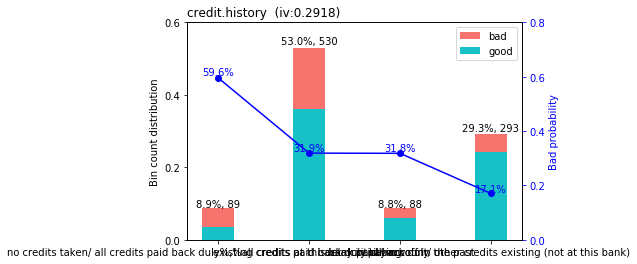

In [7]:
# woe binning ------
bins = sc.woebin(dt_s, y="creditability")
sc.woebin_plot(bins)

In [8]:
# binning adjustment
# # adjust breaks interactively
# breaks_adj = sc.woebin_adj(dt_s, "creditability", bins) 
# # or specify breaks manually
breaks_adj = {
    'age.in.years': [26, 35, 40],
    'other.debtors.or.guarantors': ["none", "co-applicant%,%guarantor"]
}
bins_adj = sc.woebin(dt_s, y="creditability", breaks_list=breaks_adj)

[INFO] creating woe binning ...


In [9]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'creditability']
X_train = train_woe.loc[:,train_woe.columns != 'creditability']
y_test = test_woe.loc[:,'creditability']
X_test = test_woe.loc[:,train_woe.columns != 'creditability']

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [10]:
# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
# lr.coef_
# lr.intercept_

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

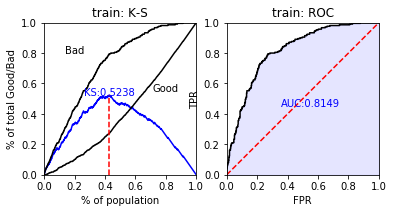

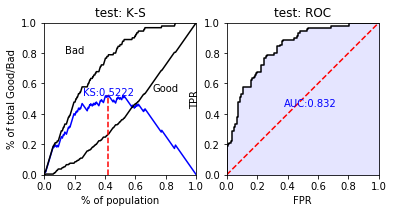

In [12]:
# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [13]:
# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)


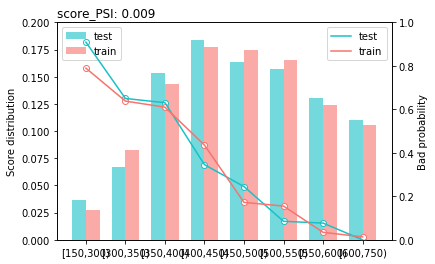

{'psi':   variable       PSI
 0    score  0.008984, 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [14]:
# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)